Results distribution
{"'1234'": 6550, "'03'": 547, "'13'": 5576, "'123'": 85, "'12345'": 292, "'013'": 1212, "'01234'": 1288, "'014'": 35, "'023'": 267, "'0'": 172, "'05'": 53, "'3'": 13, "'1'": 15, "'012'": 77, "'134'": 21, "'012345'": 98, "'0124'": 32, "'0135'": 9, "'01239'": 1, "'0136'": 5, "'036'": 1, "'0139'": 1, "'0134'": 1, "'012349'": 16, "'01'": 23, "'0123'": 18, "'12346'": 4, "'01369'": 1, "'19'": 1, "'5'": 3, "'012346'": 3, "'0236'": 2}
Total
16422
1234 - relative
0.3988551942516137
13 - relative
0.33954451345755693


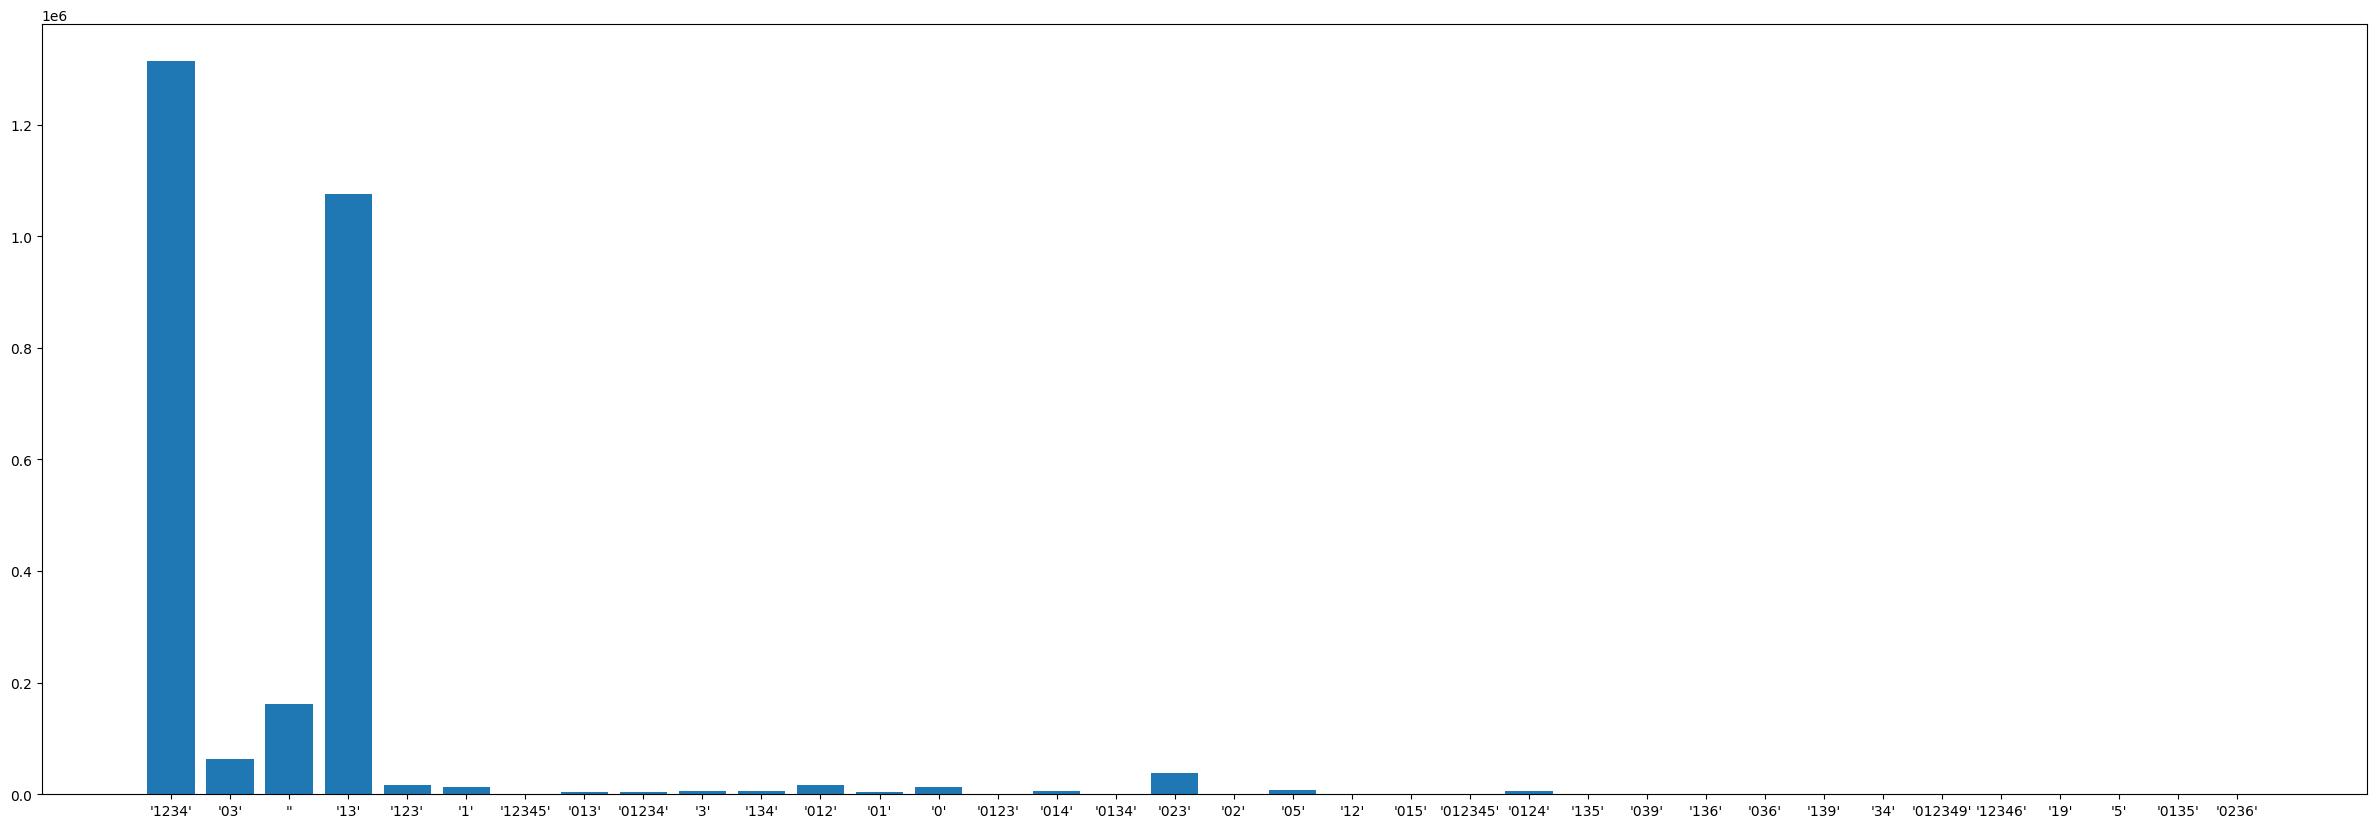

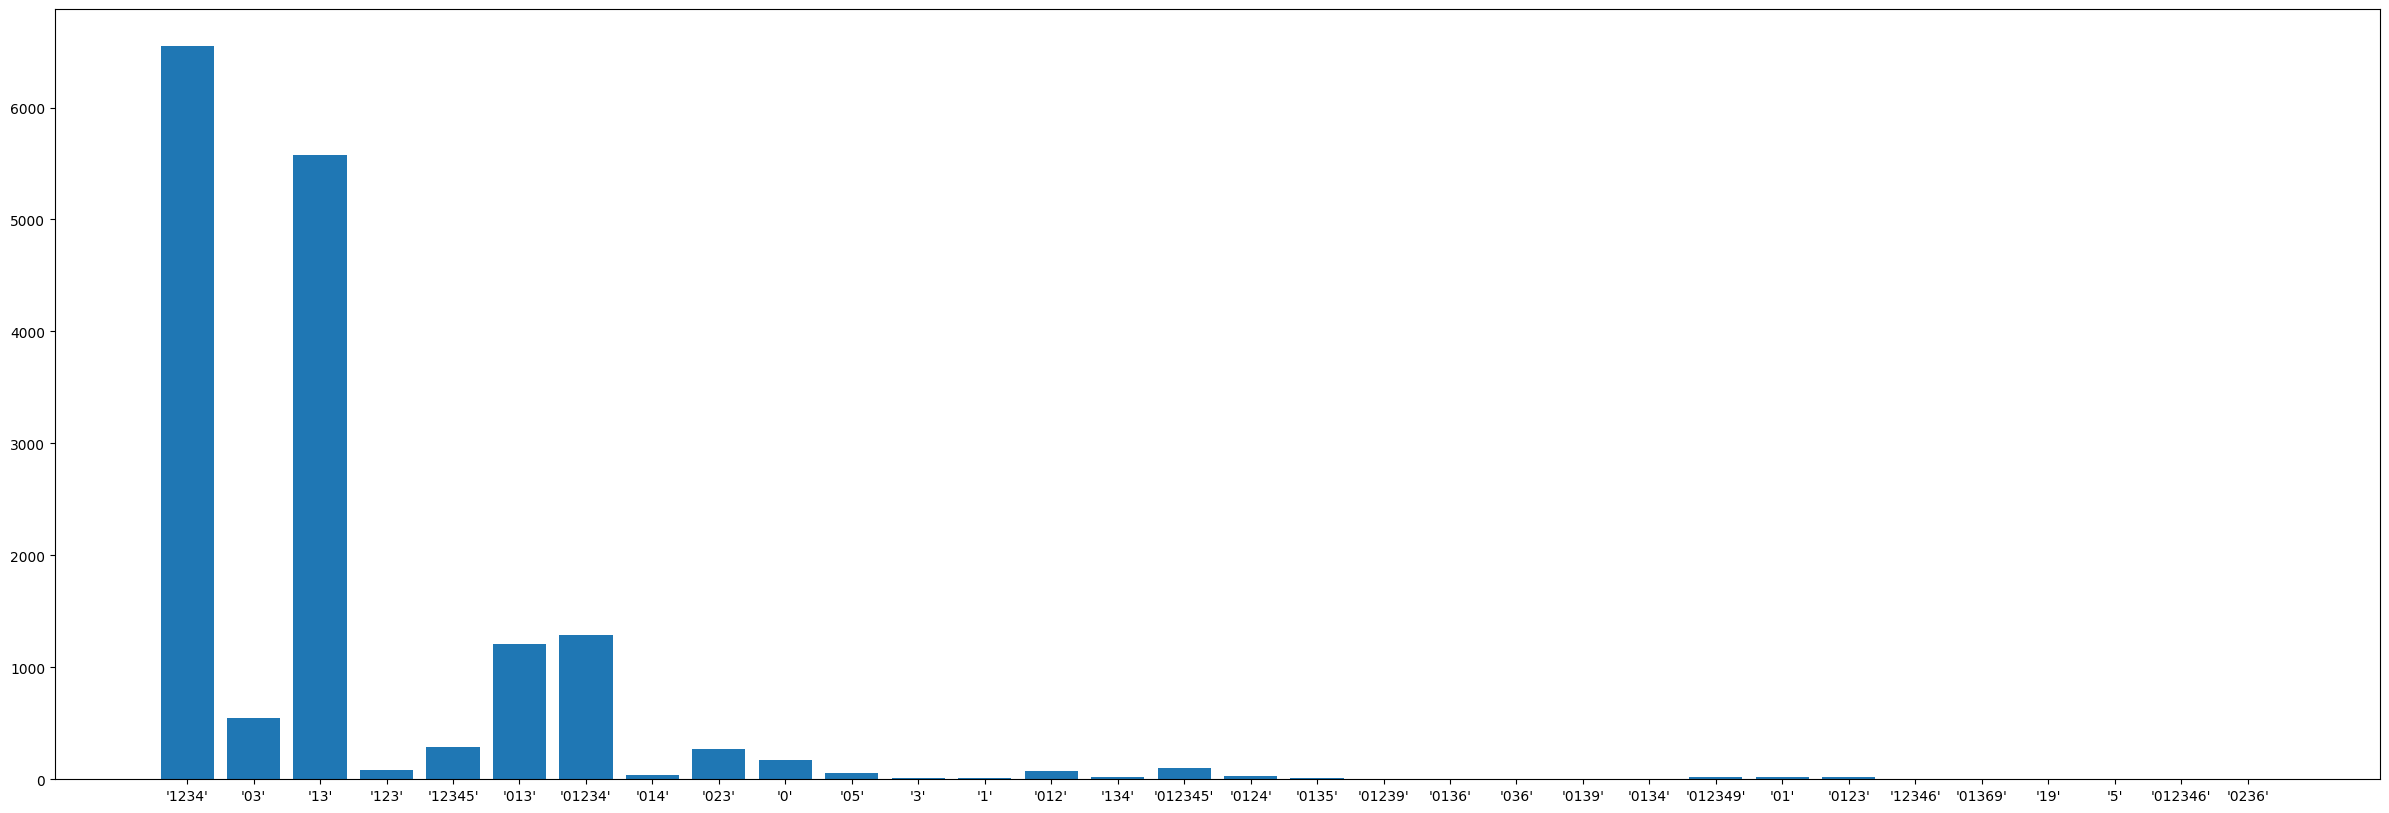

In [14]:
import json
import matplotlib.pyplot as plt

with open('data/processed_things_2024_01_22.json') as f:
    processed_things = json.load(f)
    
results_distribution = {}
results_distribution_things = {}
    
for thing_name, thing in processed_things.items():
    if thing["TotalCyclesCount"] == 0:
        continue
    if thing["TotalRemovedCycleCount"] / thing["TotalCyclesCount"] > 0.1:
        continue
    thing_colors = set()
    for day_idx in range(7):
        for hour_idx in range(24):
            for result in thing['Results'][day_idx][hour_idx]:
                thing_colors.add(result)
            results = thing['Results'][day_idx][hour_idx]
            sorted_results = sorted(results)
            results_string = ''.join(str(e) for e in sorted_results)
            string = "'" + results_string + "'"
            if string not in results_distribution:
                results_distribution[string] = 1
            else:
                results_distribution[string] += 1
    thing_colors_list = list(thing_colors)
    thing_colors_list.sort()
    thing_colors_string = ''.join(str(e) for e in thing_colors_list)
    string = "'" + thing_colors_string + "'"
    if string == "''":
        print(thing)
    if string not in results_distribution_things:
        results_distribution_things[string] = 1
    else:
        results_distribution_things[string] += 1
        
print("Results distribution")
print(results_distribution_things)
print("Total")
print(sum(results_distribution_things.values()))
print("1234 - relative")
print(results_distribution_things["'1234'"]/sum(results_distribution_things.values()))
print("13 - relative")
print(results_distribution_things["'13'"]/sum(results_distribution_things.values()))

fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(range(len(results_distribution)), list(results_distribution.values()), align='center')
ax.set_xticks(range(len(results_distribution)))
ax.set_xticklabels(list(results_distribution.keys()))
plt.show()

fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(range(len(results_distribution_things)), list(results_distribution_things.values()), align='center')
ax.set_xticks(range(len(results_distribution_things)))
ax.set_xticklabels(list(results_distribution_things.keys()))
plt.show()
                

In [4]:
import json

with open('data/processed_things_2024_01_22.json') as f:
    processed_things = json.load(f)
    
total_cycles_count = 0
total_gaps_between_cycles_count = 0
total_primary_signal_missing_count = 0
total_cycle_second_missing_count = 0
total_skipped_cycles_count = 0
total_removed_cycles_count = 0
total_invalid_cycle_length_count = 0
total_invalid_cycle_transition_count = 0
total_invalid_cycle_missing_count = 0

for thing_name, thing in processed_things.items():
    total_cycles_count += thing["TotalCyclesCount"]
    total_gaps_between_cycles_count += thing["GapsBetweenCyclesCount"]
    total_primary_signal_missing_count += thing["PrimarySignalMissingCount"]
    total_cycle_second_missing_count += thing["CycleSecondMissingCount"]
    total_skipped_cycles_count += thing["TotalSkippedCycles"]
    total_removed_cycles_count += thing["TotalRemovedCycleCount"]
    total_invalid_cycle_length_count += thing["TotalInvalidCycleLengthCount"]
    total_invalid_cycle_transition_count += thing["TotalInvalidCycleTransitionCount"]
    total_invalid_cycle_missing_count += thing["TotalInvalidCycleMissingCount"]
    
    
print(f"Total cycles count: {total_cycles_count}")
print(f"Total gaps between cycles count: {total_gaps_between_cycles_count}")
print(f"Total primary signal missing count: {total_primary_signal_missing_count}")
print(f"Total cycle second missing count: {total_cycle_second_missing_count}")
print(f"Total skipped cycles count: {total_skipped_cycles_count}")
print(f"Total removed cycles count: {total_removed_cycles_count}")
print(f"Total invalid cycle length count: {total_invalid_cycle_length_count}")
print(f"Total invalid cycle transition count: {total_invalid_cycle_transition_count}")
print(f"Total invalid cycle missing count: {total_invalid_cycle_missing_count}")

Total cycles count: 424284274
Total gaps between cycles count: 5668017
Total primary signal missing count: 15685083
Total cycle second missing count: 4466944
Total skipped cycles count: 19315712
Total removed cycles count: 13755057
Total invalid cycle length count: 8399133
Total invalid cycle transition count: 6027201
Total invalid cycle missing count: 7049388


In [11]:
import json

with open('data/processed_things_2024_01_22.json') as f:
    processed_things = json.load(f)
    
primary_things_count = 0
secondary_things_count = 0
    
for thing_name, thing in processed_things.items():
    if thing["TotalCyclesCount"] == 0:
        continue
    # if thing["TotalRemovedCycleCount"] / thing["TotalCyclesCount"] > 0.1:
    #     continue
    if "primary" in thing_name:
        primary_things_count += 1
    if "secondary" in thing_name:
        secondary_things_count += 1
        
print(f"Primary things count: {primary_things_count}")
print(f"Secondary things count: {secondary_things_count}")

Primary things count: 18009
Secondary things count: 519


In [9]:
import json

with open('data/things.json') as f:
    things = json.load(f)
    
total_count = 0

for thing in things:
    total_count += 1
    
print(f"Total things count: {total_count}")

Total things count: 19844
